In [5]:
import pandas as pd
df=pd.read_csv("musae_facebook_edges.csv",sep=",")
df

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829
...,...,...
170997,20188,20188
170998,22340,22383
170999,22348,22348
171000,5563,5563


Graph with 22470 nodes and 171002 edges


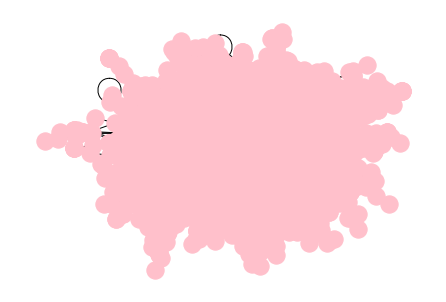

In [6]:
import networkx as nx
G=nx.from_pandas_edgelist(df,'id_1','id_2')
print(nx.info(G))
nx.draw(G,node_color='pink')

In [30]:
partition=[]
set_1=set()
set_2=set()
set_3=set()
set_4=set()
set_5=set()
for i in range(0,4494,1):
    set_1.add(i)
    
for i in range(4494,8988,1):
    set_2.add(i)
    
for i in range(8988,13482,1):
    set_3.add(i)  
    
for i in range(13482,17976,1):
    set_4.add(i)
    
for i in range(17976,22470,1):
    set_5.add(i)    
partition.append(set_1)
partition.append(set_2)
partition.append(set_3)
partition.append(set_4)
partition.append(set_5)

In [31]:
nx.community.is_partition(G, partition)

True

In [39]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

modularity(G, partition)

0.000544667690746587

In [40]:
nx.community.quality.modularity(G, partition)

0.0005446676907465836

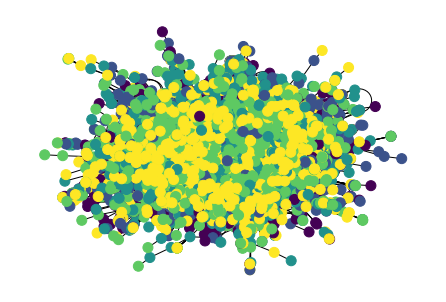

In [36]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

node_colors = [partition_map[n] for n in G.nodes]
nx.draw(G, node_color=node_colors,node_size=100)